<h1>Analysis of blood types data retrieved by process of webscraping<h1>

In [5]:
#imports

from selenium import webdriver
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import html.parser
from bs4 import *
import re

In [10]:
#webscraping and organizing data

driver = webdriver.Chrome(executable_path='C:\Python39\Scripts\chromedriver')

driver.get('https://pt.wikipedia.org/wiki/Distribui%C3%A7%C3%A3o_do_tipo_sangu%C3%ADneo_por_pa%C3%ADs')
content = driver.page_source
soup = BeautifulSoup(content, 'html.parser')

countryNames = []
countryNamesTreated = []
population = []
bloodTypes = []
bloodTypesTreated = []

# O1 = O+
# A1 = A+
# B1 = B+
# AB1 = AB+
# O2 = O-
# A2 = A-
# B2 = B-
# AB2 = AB-


for a in soup.find_all('tbody'):
    for b in a.find_all('tr'):
        for c in b.find_all('td'):
            c = re.sub(r"[\n\t\s]*", "", c.get_text())
            if c == 'Aboriginal people':
                break
                
            else:
                bloodTypes.append(c)
            
        for d in b.find_all('th'):
            countryNames.append(d.get_text())
    break
            
for i in countryNames:
    if i[0] == " ":
        i = i[1:]
        i = re.sub(r"[\n]", "", i)
        country = i.split("[")[0]
        countryNamesTreated.append(country)
            
    else:
        i = re.sub(r"[\n]", "", i)
        country = i.split("[")[0]
        countryNamesTreated.append(country) 
        
for i in bloodTypes:
    if i[-1] == '%':
        bloodTypesTreated.append(i.replace("%", ""))
        
    else:
        population.append(i.replace(",", ""))

if countryNamesTreated[0] != 'Argentina':
    countryNamesTreated = countryNamesTreated[10:]

else:
    pass
        
O1 = bloodTypesTreated[::8]
A1 = bloodTypesTreated[1::8]
B1 = bloodTypesTreated[2::8]
AB1 = bloodTypesTreated[3::8]
O2 = bloodTypesTreated[4::8]
A2 = bloodTypesTreated[5::8]
B2 = bloodTypesTreated[6::8]
AB2 = bloodTypesTreated[7::8]

driver.quit()

indict = {"Country":countryNamesTreated, "Population":population, "O+":O1, "A+":A1, "B+":B1, "AB+":AB1, "O-":O2, "A-":A2, "B-":B2, "AB-":AB2}

df = pd.DataFrame.from_dict(data=indict)
print(df.head())
df.to_csv(path_or_buf="./dataframe.csv")

     Country Population     O+     A+     B+   AB+    O-    A-    B-   AB-
0  Argentina   44270440   45.4  34.26   8.59  2.64   8.4  0.44  0.21  0.06
1    Armênia    2931568   29.0   46.3   12.0   5.6   2.0   3.7   1.0   0.4
2  Austrália   24642693   40.0   31.0    8.0   2.0   9.0   7.0   2.0   1.0
3    Áustria    8592470   30.0   33.0   12.0   6.0   7.0   8.0   3.0   1.0
4      Barém    1418695  48.48  19.35  22.61  3.67  3.27  1.33  1.04  0.25


           Population     O+     A+     B+   AB+    O-    A-    B-   AB-
Country                                                                 
Argentina    44270440  45.40  34.26   8.59  2.64  8.40  0.44  0.21  0.06
Armênia       2931568  29.00  46.30  12.00  5.60  2.00  3.70  1.00  0.40
Austrália    24642693  40.00  31.00   8.00  2.00  9.00  7.00  2.00  1.00
Áustria       8592470  30.00  33.00  12.00  6.00  7.00  8.00  3.00  1.00
Barém         1418695  48.48  19.35  22.61  3.67  3.27  1.33  1.04  0.25


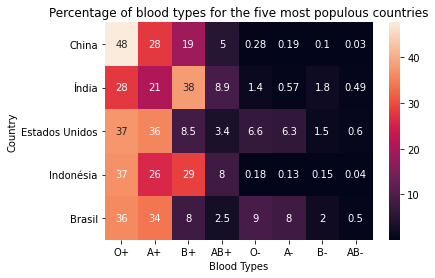

In [13]:
#organizing data to fit heatmap and creating it

df = pd.read_csv('./dataframe.csv', index_col=[0])
df = df.set_index('Country')
print(df.head())
df = df.sort_values(by='Population', ascending=False)
df = df.drop(['Population'], axis=1)
df = df.drop(['Mundo'], axis=0)
df = df.head()
sns.heatmap(data=df, annot=True)
plt.xlabel("Blood Types")
plt.title("Percentage of blood types for the five most populous countries")
fig = plt.figure(1)
rect = fig.patch
rect.set_facecolor("white")
plt.savefig("bloodtypesheatmap.png", bbox_inches="tight", facecolor=fig.get_facecolor())